## **Building Digital Twin for DWM Using Decision Tree and Random Forest Algorithms**

by Nicholas Hagan (nkhagan@ualr.edu)

Goal: Predict the performance of the Data Washing Machine using the sample characteristics. Note: All machine parameters are dropped. 

Target variables: Precision, Recall, F-Measure (call one at a time)

Predictive variables: Unique Ratio, Numberic Ratio, Min freq, Max freq, Ave freq, Stdev freq, Min lenght, Max lenght, Ave lenght, Stdev lenght, Min freq Std token, Min lenght Std token, Max freq Error token, Max Blck token len

The algorithm is tested on each sample, quality groups, and mixed. 


In [1]:
#Installing and importing libraries

#!pip install scikit-plot
import os
import io 
import pandas as pd
from pandas import Series
from pandas import DataFrame as df
import numpy as np
#import scikitplot as skplt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics
from sklearn.tree import DecisionTreeRegressor 
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm

In [2]:
#Importing the dataset
data = pd.read_csv("DWM Sample Test Results.csv", sep = ",")  
dfd = pd.DataFrame(data)
dfd

,SAMPLE,PRECISION,RECALL,F-MEAS,LINKEDPAIRS,EXPECTEDPAIRS,TRUEPAIRS,TOKENIZERTYPE,NBR_REFS,TOTAL_TOKENS,...,REMOVE_DUPLICATE_TOKENS,REMOVE_EXCLUDED_BLK_TOKENS,EPSILON,EPSILON_ITERATE,MU,MU_ITERATE,COMPARATOR,MATRIX_NUM_TOKEN_RULE,MATRIX_INITIAL_RULE,BLOCKCORRECTION
0,S1G.txt,1.0000,1.0000,1.0000,27,27,27,Compress,50,543,...,True,True,0.500,0.000,0.60,0.05,ScoringMatrixKris,True,True,False
1,S1G.txt,1.0000,1.0000,1.0000,27,27,27,Compress,50,543,...,True,True,0.004,0.001,0.60,0.05,ScoringMatrixKris,True,True,False
2,S1G.txt,1.0000,1.0000,1.0000,27,27,27,Compress,50,543,...,True,True,0.500,0.000,0.60,0.05,ScoringMatrixKris,True,True,False
3,S1G.txt,1.0000,1.0000,1.0000,27,27,27,Compress,50,543,...,True,True,0.004,0.001,0.60,0.05,ScoringMatrixKris,True,True,False
4,S1G.txt,1.0000,1.0000,1.0000,27,27,27,Compress,50,543,...,True,True,0.475,0.000,0.60,0.05,ScoringMatrixKris,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6121,join1.txt,0.6788,0.2024,0.3118,37844,126914,25690,Splitter,24417,546726,...,True,True,0.700,0.000,0.79,0.05,ScoringMatrixKris,True,True,True
6122,join1.txt,0.6788,0.2024,0.3118,37844,126914,25690,Splitter,24417,546726,...,True,True,0.700,0.000,0.79,0.05,ScoringMatrixKris,True,True,True
6123,join1.txt,0.6749,0.2024,0.3114,38068,126914,25692,Splitter,24417,546894,...,True,True,0.700,0.000,0.79,0.05,ScoringMatrixKris,True,True,True
6124,join1.txt,0.6757,0.2029,0.3121,38105,126914,25747,Splitter,24417,547252,...,True,True,0.700,0.000,0.79,0.05,ScoringMatrixKris,True,True,True


C:\Users\nicho\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RECALL', ylabel='Density'>

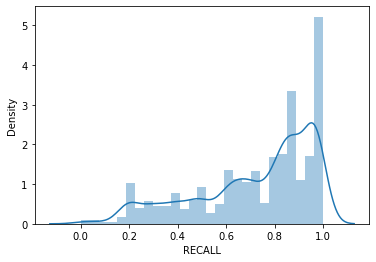

In [3]:
#visually exploring the dataset 
sb.distplot(dfd['RECALL'])       #histogram for precision values

In [4]:
##DROPPING MACHINE PARAMETERS/SETTINGS and THEIR X'TICS;select only sample characteristers

dfd.drop(['LINKEDPAIRS', 'EXPECTEDPAIRS', 'TRUEPAIRS','TOTAL_NUMERIC','TOKENIZERTYPE', 'NBR_REFS', 'TOTAL_TOKENS',
          'UNIQUE_TOKENS','REMOVE_DUPLICATE_TOKENS','REMOVE_EXCLUDED_BLK_TOKENS','EPSILON','EPSILON_ITERATE','MU','MU_ITERATE',
          'BETA','SIGMA','COMPARATOR','MATRIX_NUM_TOKEN_RULE','MATRIX_INITIAL_RULE','BLOCKCORRECTION','BLOCK_BY_PAIRS',
            'RUN_GLOBAL_CORRECTION','EXCLUDE_NUMERIC_BLOCKS'],axis=1, inplace = True)


##INCLUDE A TARGET VARIABLE TO THE NEW DATA BY DROPPING THE REST 
dfd.drop(['RECALL','F-MEAS'],axis=1, inplace = True) #Target Variables: PRECISION, RECALL, F-MEAS
dfd

##EXTRRACTING SAMPLE TYPES TO USE
#Data samples: S1G.txt,S2G.txt,S3Rest.txt,S4G.txt,S5G.txt,S6GeCo.txt,S7GX.txt,S8P.txt,S9P.txt,S10PX.txt,S11PX.txt,
#S12PX.txt,S13GX.txt,S14GX.txt,S15GX.txt,S16PX.txt,S17PX.txt,S18PX.txt,join1.txt,Pilog.txt,pilog11.txt      

#samp = dfd[dfd["SAMPLE"] == 'S18PX.txt']                                                          #individual sample type
#samp

                      ##select multiple sample types using the 'or' '|' operator##
#samp = dfd[(dfd["SAMPLE"] == 'S1G.txt')|(dfd["SAMPLE"] == 'S2G.txt')|(dfd["SAMPLE"] == 'S4G.txt')|
#         (dfd["SAMPLE"] == 'S5G.txt')|(dfd["SAMPLE"] == 'S7GX.txt')|(dfd["SAMPLE"] == 'S13GX.txt')|
#       (dfd["SAMPLE"] == 'S14GX.txt')|(dfd["SAMPLE"] == 'S15GX.txt')]                              #good quality samples only              
#samp

samp = dfd[(dfd["SAMPLE"] == 'S8P.txt')|(dfd["SAMPLE"] == 'S9P.txt')|(dfd["SAMPLE"] == 'S10PX.txt')|
         (dfd["SAMPLE"] == 'S11PX.txt')|(dfd["SAMPLE"] == 'S12PX.txt')|(dfd["SAMPLE"] == 'S16PX.txt')|
         (dfd["SAMPLE"] == 'S17PX.txt')|(dfd["SAMPLE"] == 'S8PX.txt')]                             #poor quality samples only              
samp

,SAMPLE,PRECISION,UNIQUE_RATIO,NUMERIC_RATIO,MIN_FREQ,MAX_FREQ,AVG_FREQ,STDEV_FREQ,MIN_LEN,MAX_LEN,AVG_LEN,STDEV_LEN,MIN_FREQ_STD_TOKEN,MIN_LEN_STD_TOKEN,MAX_FREQ_ERR_TOKEN,MIN_BLK_TOKEN_LEN
608,S10PX.txt,0.7179,0.2360,0.2360,1,722,4.2372,16.7776,1,15,4.9253,2.5839,4,3,3,4
609,S10PX.txt,0.7179,0.2360,0.2360,1,722,4.2372,16.7776,1,15,4.9253,2.5839,4,3,3,4
610,S10PX.txt,0.7179,0.2360,0.2360,1,722,4.2372,16.7776,1,15,4.9253,2.5839,4,3,3,4
611,S10PX.txt,0.7179,0.2360,0.2360,1,722,4.2372,16.7776,1,15,4.9253,2.5839,4,3,3,4
612,S10PX.txt,0.7179,0.2360,0.2360,1,722,4.2372,16.7776,1,15,4.9253,2.5839,4,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,S17PX.txt,0.7700,0.1474,0.1474,1,1362,6.7832,30.0717,1,16,4.4286,2.2330,5,3,3,4
5985,S17PX.txt,0.8217,0.1474,0.1474,1,1362,6.7832,30.0717,1,16,4.4286,2.2330,5,3,3,4
5986,S17PX.txt,0.9012,0.1474,0.1474,1,1362,6.7832,30.0717,1,16,4.4286,2.2330,5,3,3,4
5987,S17PX.txt,0.9147,0.1474,0.1474,1,1362,6.7832,30.0717,1,16,4.4286,2.2330,5,3,3,4


In [5]:
###COLUMN FILTERING 2 - DROPPING SAMPLE NAME COLUMN
pd.set_option('mode.chained_assignment', None)   #Prevents a run-time warning
samp.drop('SAMPLE',axis=1, inplace = True)
samp

,PRECISION,UNIQUE_RATIO,NUMERIC_RATIO,MIN_FREQ,MAX_FREQ,AVG_FREQ,STDEV_FREQ,MIN_LEN,MAX_LEN,AVG_LEN,STDEV_LEN,MIN_FREQ_STD_TOKEN,MIN_LEN_STD_TOKEN,MAX_FREQ_ERR_TOKEN,MIN_BLK_TOKEN_LEN
608,0.7179,0.2360,0.2360,1,722,4.2372,16.7776,1,15,4.9253,2.5839,4,3,3,4
609,0.7179,0.2360,0.2360,1,722,4.2372,16.7776,1,15,4.9253,2.5839,4,3,3,4
610,0.7179,0.2360,0.2360,1,722,4.2372,16.7776,1,15,4.9253,2.5839,4,3,3,4
611,0.7179,0.2360,0.2360,1,722,4.2372,16.7776,1,15,4.9253,2.5839,4,3,3,4
612,0.7179,0.2360,0.2360,1,722,4.2372,16.7776,1,15,4.9253,2.5839,4,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5984,0.7700,0.1474,0.1474,1,1362,6.7832,30.0717,1,16,4.4286,2.2330,5,3,3,4
5985,0.8217,0.1474,0.1474,1,1362,6.7832,30.0717,1,16,4.4286,2.2330,5,3,3,4
5986,0.9012,0.1474,0.1474,1,1362,6.7832,30.0717,1,16,4.4286,2.2330,5,3,3,4
5987,0.9147,0.1474,0.1474,1,1362,6.7832,30.0717,1,16,4.4286,2.2330,5,3,3,4


In [6]:
samp.columns

Index(['PRECISION', 'UNIQUE_RATIO', 'NUMERIC_RATIO', 'MIN_FREQ', 'MAX_FREQ',
       'AVG_FREQ', 'STDEV_FREQ', 'MIN_LEN', 'MAX_LEN', 'AVG_LEN', 'STDEV_LEN',
       'MIN_FREQ_STD_TOKEN', 'MIN_LEN_STD_TOKEN', 'MAX_FREQ_ERR_TOKEN',
       'MIN_BLK_TOKEN_LEN'],
      dtype='object')

In [7]:
samp.describe()

,PRECISION,UNIQUE_RATIO,NUMERIC_RATIO,MIN_FREQ,MAX_FREQ,AVG_FREQ,STDEV_FREQ,MIN_LEN,MAX_LEN,AVG_LEN,STDEV_LEN,MIN_FREQ_STD_TOKEN,MIN_LEN_STD_TOKEN,MAX_FREQ_ERR_TOKEN,MIN_BLK_TOKEN_LEN
count,1964.000000,1964.000000,1964.000000,1964.0,1964.000000,1964.000000,1964.000000,1964.0,1964.000000,1964.000000,1964.000000,1964.000000,1964.0,1964.000000,1964.000000
mean,0.433755,0.210731,0.211333,1.0,991.218941,5.017991,20.909671,1.0,16.071283,4.481173,2.247178,4.680754,3.0,3.000509,2.585031
std,0.304946,0.051367,0.052796,0.0,589.149531,1.140735,8.430754,0.0,2.187821,0.153548,0.110132,0.466303,0.0,0.022565,0.847158
min,0.001900,0.139000,0.139000,1.0,232.000000,3.041300,9.453700,1.0,13.000000,4.298200,2.107800,4.000000,3.0,3.000000,2.000000
25%,0.006400,0.166400,0.166400,1.0,405.000000,3.823700,11.939800,1.0,15.000000,4.404300,2.207000,4.000000,3.0,3.000000,2.000000
50%,0.537700,0.194600,0.194600,1.0,790.000000,5.138600,18.706200,1.0,15.000000,4.429000,2.232800,5.000000,3.0,3.000000,2.000000
75%,0.687800,0.261500,0.261500,1.0,1538.000000,6.008800,29.409200,1.0,16.000000,4.537600,2.255800,5.000000,3.0,3.000000,3.000000
max,0.953100,0.328800,0.400500,1.0,2011.000000,7.194800,33.728100,1.0,21.000000,5.175100,2.753400,5.000000,3.0,4.000000,4.000000


In [8]:
## 'P' means predictor variables/dependent variables/determinants
## 't' means target variable/independent variable


##Defining input and outcome variables
X = samp.iloc[:,1:]    #Sample X'tics --depentent variables
#X.head(10)
y = samp.iloc[:,0]     #Precision  #Recall  #F-Meas  --indepentent variables
#y.head(10)

##Splitting the dataset
#p,t = (samp,samp)      #defining variables for predictors and target
#p,t = (depv,indv)
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.30, random_state=24) #using same random_state value for replicability
###Meaning of data split categories
   ##X_train = dep. variables used for training the model
   ##Y_train = indep. variables used to training the model together with X-train
   ##X_test = dep. variables used for testing the model after training
   ##Y_test = indep. variables used for testing the model together with X-test. To be used to comapre predicted values after training
#X_train.describe()      #dataset after splitting
X_test.shape

(590, 14)

### Decision Tree Regression model

In [9]:
##Calling the decision tree regressor model with default settings and fitting the dataset with model
DecTree_reg = DecisionTreeRegressor()                #model without random state gives different result(higher accuracy??)
#DecTree_reg = DecisionTreeRegressor(random_state=24) 
DecTree_reg.fit(X_train, Y_train)

DecisionTreeRegressor()

In [10]:
##Predict new value
y_pred_DTR = DecTree_reg.predict(X_test)   #predicting new precision values using X_test
print(y_pred_DTR)

[0.77570784 0.52695556 0.88391    0.57412857 0.67593333 0.76663333
 0.63409091 0.71287838 0.45482609 0.60154906 0.4517     0.5292
 0.6375     0.6775     0.4955     0.16111304 0.6791     0.2756
 0.6468     0.16111304 0.71287838 0.67173333 0.70446923 0.12866667
 0.6908     0.692875   0.6791     0.00934    0.6908     0.62511429
 0.41344    0.39584    0.7372     0.12854    0.1175     0.6674875
 0.7508     0.63409091 0.8        0.6468     0.60154906 0.41344
 0.101912   0.8364     0.13055714 0.0029     0.08959524 0.6866
 0.08605    0.62396667 0.16111304 0.734625   0.60035    0.110225
 0.1175     0.52695556 0.13055714 0.32005    0.67173333 0.0032
 0.482332   0.71287838 0.64681053 0.692875   0.0717087  0.08605
 0.004      0.16111304 0.62396667 0.64681053 0.00205    0.6468
 0.6866     0.16111304 0.71287838 0.12854    0.16111304 0.5769
 0.0034     0.52460385 0.64681053 0.00855    0.08605    0.002
 0.734625   0.4955     0.7027     0.1175     0.0717087  0.5584
 0.12854    0.8934     0.6398     0.7

In [11]:
##Evaluation of new prediction and model accuracy
print("Root Mean squared error: %.2f" % math.sqrt(metrics.mean_squared_error(Y_test, y_pred_DTR)))
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(Y_test, y_pred_DTR))
#print("Accuracy: %.2f" % metrics.r2_score(Y_test,y_pred_DTR))

Root Mean squared error: 0.11
Mean absolute error: 0.07


### Random Forest Regression model

In [12]:
##Calling the random forest regression model
RanFor_reg = RandomForestRegressor(n_estimators = 50, min_samples_leaf=5) #model without random state gives different result(higher accuracy??)
#RanFor_reg = RandomForestRegressor(n_estimators = 50, min_samples_leaf=5, random_state = 24)
##Fitting the model with dataset
RanFor_reg.fit(X_train, Y_train)

RandomForestRegressor(min_samples_leaf=5, n_estimators=50)

In [13]:
##Predict new precision values
y_pred_RFR = RanFor_reg.predict(X_test)
print(y_pred_RFR)

[0.77570231 0.52182891 0.87860225 0.57130641 0.66948924 0.74016269
 0.63525555 0.71355263 0.45324224 0.59825265 0.50465963 0.49299223
 0.68233348 0.68430935 0.49281651 0.16171141 0.6509816  0.39002923
 0.6430262  0.16171141 0.71355263 0.67538949 0.70421053 0.13786929
 0.68850298 0.70350587 0.6509816  0.00726181 0.68850298 0.62132973
 0.3168851  0.4160779  0.73658359 0.13924545 0.11831014 0.66731574
 0.7468093  0.63525555 0.74567141 0.6430262  0.59825265 0.3168851
 0.09717727 0.7611893  0.13837293 0.00409542 0.09896816 0.70283759
 0.08924886 0.62690697 0.16171141 0.72204097 0.58603553 0.11738835
 0.11831014 0.52182891 0.13837293 0.34102201 0.67538949 0.00378447
 0.48157793 0.71355263 0.64875192 0.70350587 0.06665497 0.08924886
 0.00669749 0.16171141 0.62690697 0.64875192 0.00226149 0.6430262
 0.70116692 0.16171141 0.71355263 0.13924545 0.16171141 0.48365295
 0.01941098 0.52654659 0.64875192 0.0210156  0.08924886 0.00205405
 0.72204097 0.49281651 0.69188715 0.11831014 0.06665497 0.584475

In [14]:
#evaluting RandForest_reg and model accuracy
print("Root Mean squared error: %.2f" % math.sqrt(metrics.mean_squared_error(Y_test, y_pred_RFR)))
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(Y_test, y_pred_RFR))
#print("Accuracy: %.2f" % metrics.r2_score(Y_test,y_pred_RFR))

Root Mean squared error: 0.12
Mean absolute error: 0.07


### Support Vector Machine (SVM) Regression model

In [15]:
# Fit the SVM model over the training data
from sklearn.svm import SVR           #Support vector regressor model
SuppVec_reg = SVR(kernel = 'rbf')
SuppVec_reg.fit(X_train, Y_train)

SVR()

In [16]:
##Predict new precision values
y_pred_SVR = SuppVec_reg.predict(X_test)
print(y_pred_RFR)

[0.77570231 0.52182891 0.87860225 0.57130641 0.66948924 0.74016269
 0.63525555 0.71355263 0.45324224 0.59825265 0.50465963 0.49299223
 0.68233348 0.68430935 0.49281651 0.16171141 0.6509816  0.39002923
 0.6430262  0.16171141 0.71355263 0.67538949 0.70421053 0.13786929
 0.68850298 0.70350587 0.6509816  0.00726181 0.68850298 0.62132973
 0.3168851  0.4160779  0.73658359 0.13924545 0.11831014 0.66731574
 0.7468093  0.63525555 0.74567141 0.6430262  0.59825265 0.3168851
 0.09717727 0.7611893  0.13837293 0.00409542 0.09896816 0.70283759
 0.08924886 0.62690697 0.16171141 0.72204097 0.58603553 0.11738835
 0.11831014 0.52182891 0.13837293 0.34102201 0.67538949 0.00378447
 0.48157793 0.71355263 0.64875192 0.70350587 0.06665497 0.08924886
 0.00669749 0.16171141 0.62690697 0.64875192 0.00226149 0.6430262
 0.70116692 0.16171141 0.71355263 0.13924545 0.16171141 0.48365295
 0.01941098 0.52654659 0.64875192 0.0210156  0.08924886 0.00205405
 0.72204097 0.49281651 0.69188715 0.11831014 0.06665497 0.584475

In [17]:
#evaluting RandForest_reg and model accuracy
print("Root Mean squared error: %.2f" % math.sqrt(metrics.mean_squared_error(Y_test, y_pred_SVR)))
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(Y_test, y_pred_SVR))
#print("Accuracy: %.2f" % metrics.r2_score(Y_test,y_pred_SVR))

Root Mean squared error: 0.23
Mean absolute error: 0.16


### Comparing Different models

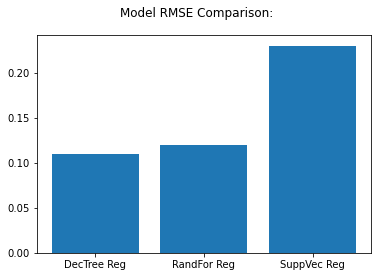

Model Error: [0.11, 0.12, 0.23]


In [18]:
#import matplotlib.pyplot as plt
names = ['DecTree Reg','RandFor Reg','SuppVec Reg']
predictions=[y_pred_DTR,y_pred_RFR,y_pred_SVR]
results = []

for y_pred in predictions:
  rmse=round(math.sqrt(metrics.mean_squared_error(Y_test, y_pred)),2)
  #mae=round(metrics.mean_absolute_error(Y_test, y_pred),2)
  results.append(rmse) #change rmse to mae 
  
# create a bar plot to compare values
fig = plt.figure()
fig.suptitle('Model RMSE Comparison: ')
ax = fig.add_subplot(111)
plt.bar(names,results)
plt.show()

print ("Model Error:",results)

### END